# Assignment Python 3

Nama : Muhammad Danu Prasetia
</br>
Kode Peserta : PYTN-KS16-020
</br>
Python for Data Science

## Project Overview

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

This dataset contains:

Input variables:

bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6. housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
7. loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

related with the last contact of the current campaign:

8. contact: contact communication type (categorical: 'cellular', 'telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

social and economic context attributes

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21. y - has the client subscribed a term deposit? (binary: 'yes', 'no')

## Import Library

In [5]:
# import library pandas
import pandas as pd

# Import library numpy
import numpy as np

# Import library matplotlib dan seaborn untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

#Model Select
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Import library confusion matrix
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score ,precision_score,recall_score,f1_score

# Import library SMOTE
# from imblearn.over_sampling import SMOTE

# Import Library Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import libarary KNN
from sklearn.neighbors import KNeighborsClassifier

# Import libarary Random Forest
from sklearn.ensemble import RandomForestClassifier

# Import libarary Support Vector Machine
from sklearn import svm

# Import libarary Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Import libarary Naive Bayes
from sklearn.naive_bayes import GaussianNB

## Data Loading

In [10]:
df = pd.read_csv('../Dataset/bank-additional-full.csv', sep = ';')
## Simpan dalam dataframe
datafr = pd.DataFrame(df)

In [11]:
## Membaca 10 Data Teratas
datafr.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
## Membaca 10 Data Teratas
datafr.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [15]:
## melihat jumlah baris dan jumlah kolom (bentuk data)
x = datafr.shape[0]
y = datafr.shape[1]

print('Jumlah Baris: ', x, '\nJumlah Kolom: ', y)

Jumlah Baris:  41188 
Jumlah Kolom:  21


In [16]:
## Melihat info detail dari dataset
datafr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [17]:
## Melihat kolom pada dataset
datafr.columns 

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [18]:
## Mencari nilai unique pada dataset
for i in datafr.columns:
    print("\n", i)
    print(datafr[i].unique())


 age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

 job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

 marital
['married' 'single' 'divorced' 'unknown']

 education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

 default
['no' 'unknown' 'yes']

 housing
['no' 'yes' 'unknown']

 loan
['no' 'yes' 'unknown']

 contact
['telephone' 'cellular']

 month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

 day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']

 duration
[ 261  149  226 ... 1246 1556 1868]

 campaign
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37

In [20]:
## Menampilkan Mean, Median, Modus, Std
datafr.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Data Cleaning

In [21]:
# Memeriksa missing value
datafr.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [23]:
## Mengecek Data Duplikat
datafr.duplicated().sum()

12

In [24]:
## Menghapus Data Duplikat
datafr.drop_duplicates(inplace=True)

In [25]:
## Mengecek Kembali Data Duplikat
datafr.duplicated().sum()

0

In [27]:
#Membuat variabel kategori untuk menampung data
kategori = datafr.select_dtypes(
            include=['object', 'bool']).columns.values

for col in kategori:
    print("Nama Kategori: ", col, "(", len(datafr[col].unique()) , "values):\n", "Nama Values: ", np.sort(datafr[col].unique()))

Nama Kategori:  job ( 12 values):
 Nama Values:  ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
Nama Kategori:  marital ( 4 values):
 Nama Values:  ['divorced' 'married' 'single' 'unknown']
Nama Kategori:  education ( 8 values):
 Nama Values:  ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
Nama Kategori:  default ( 3 values):
 Nama Values:  ['no' 'unknown' 'yes']
Nama Kategori:  housing ( 3 values):
 Nama Values:  ['no' 'unknown' 'yes']
Nama Kategori:  loan ( 3 values):
 Nama Values:  ['no' 'unknown' 'yes']
Nama Kategori:  contact ( 2 values):
 Nama Values:  ['cellular' 'telephone']
Nama Kategori:  month ( 10 values):
 Nama Values:  ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
Nama Kategori:  day_of_week ( 5 values):
 Nama Values:  ['fri' 'mon' 'thu' 'tue' 'wed']
Nama Kategori:  poutcome ( 3 values):
 

## Data Visualisasi

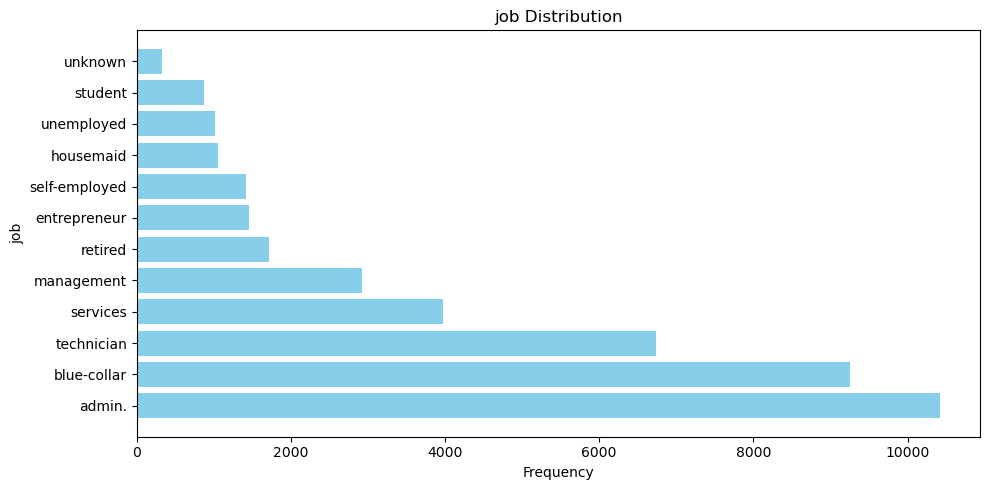

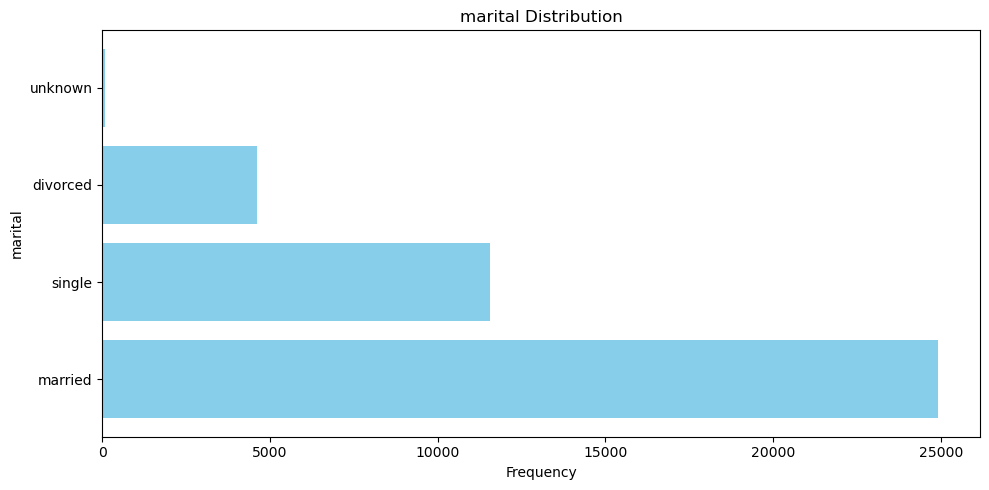

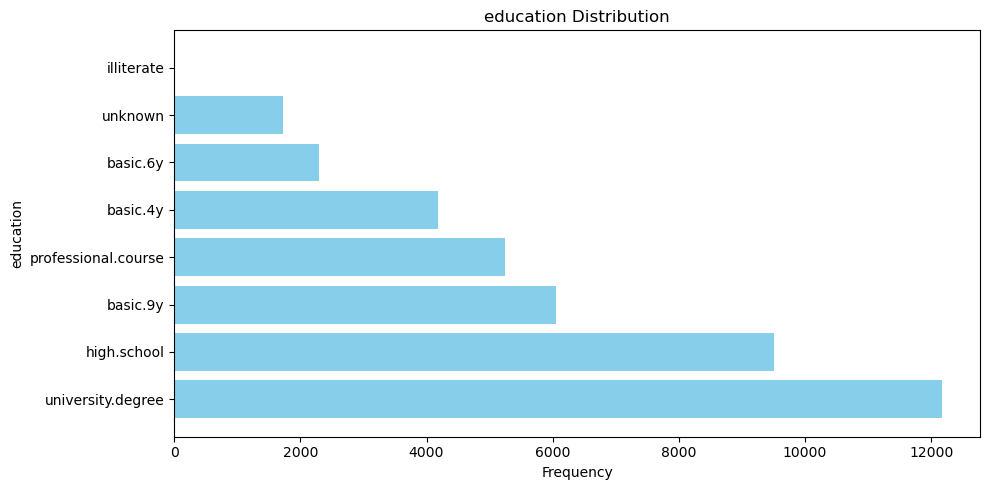

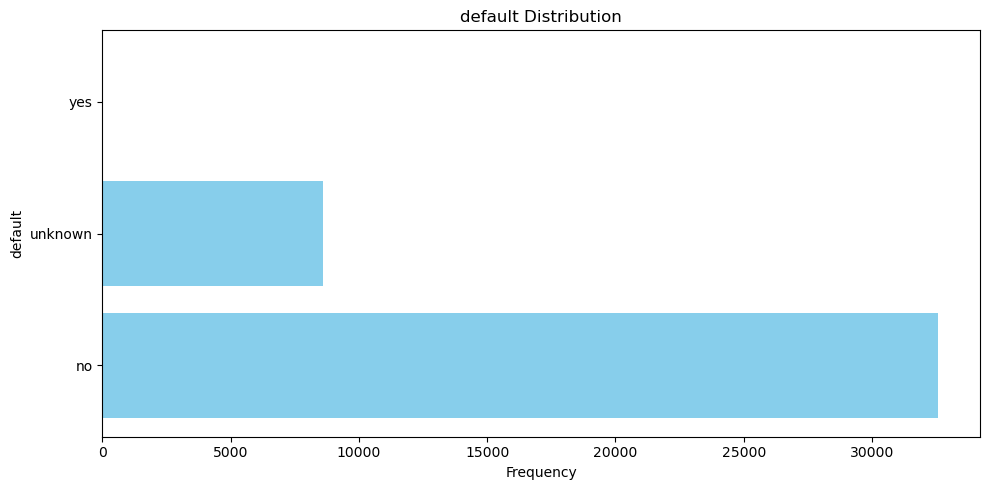

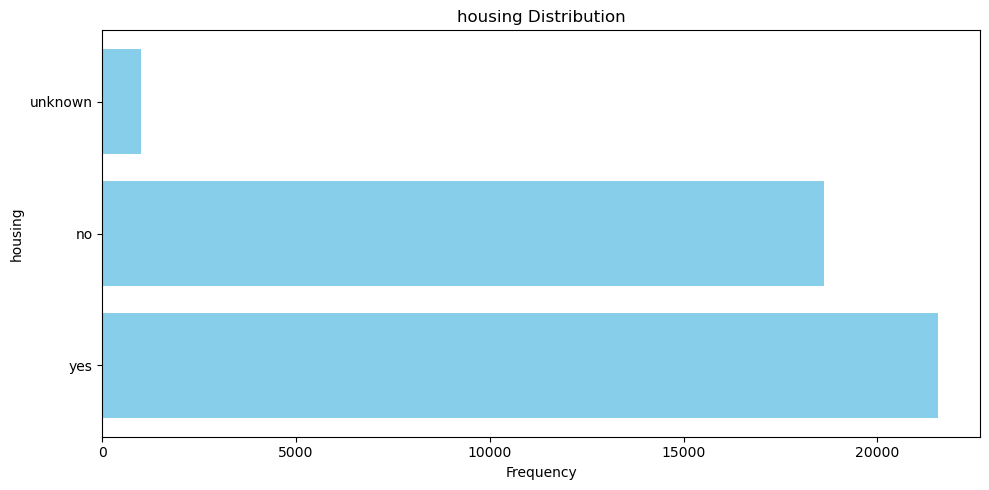

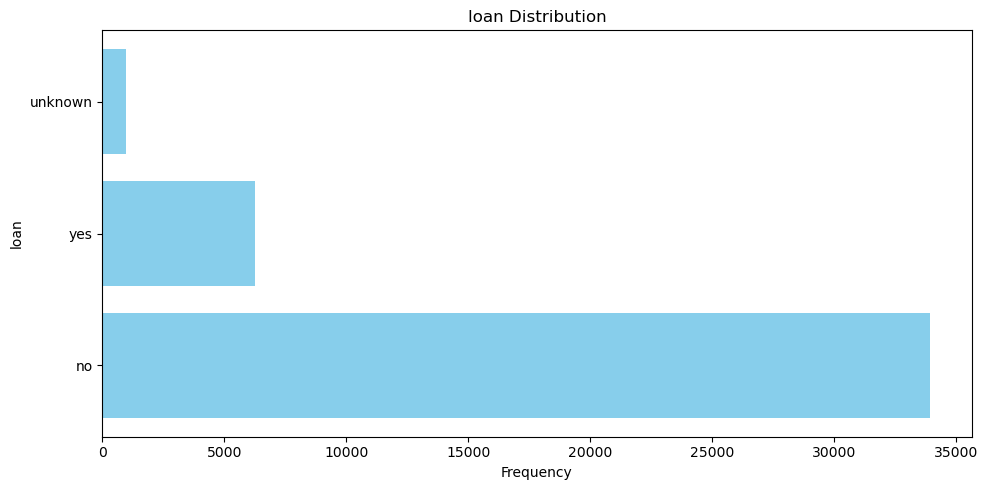

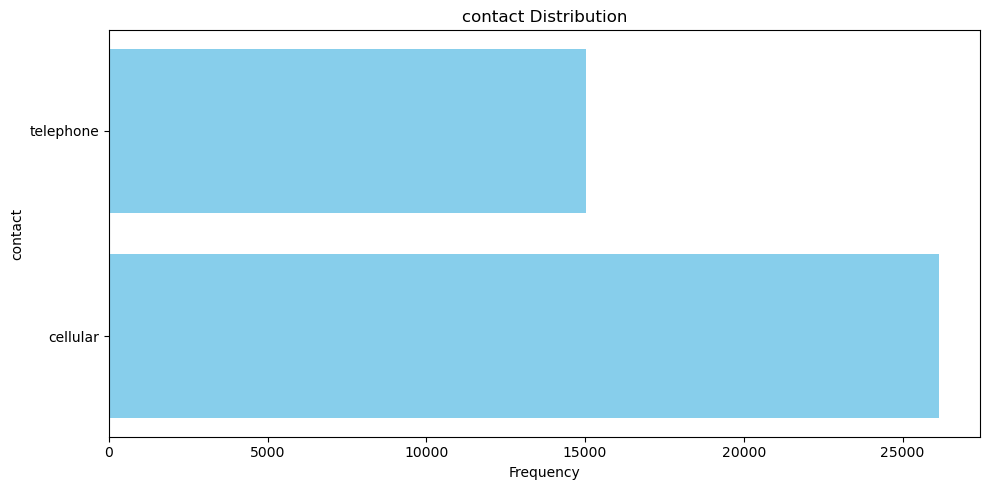

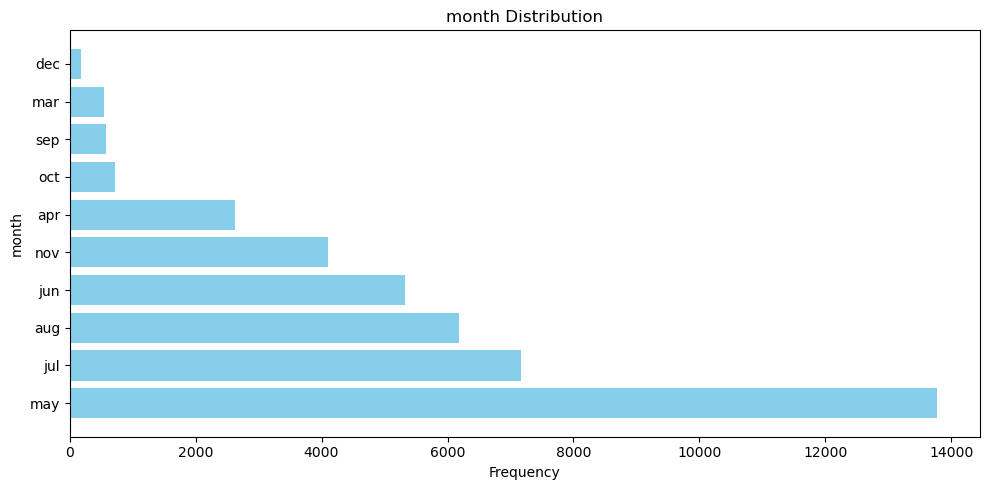

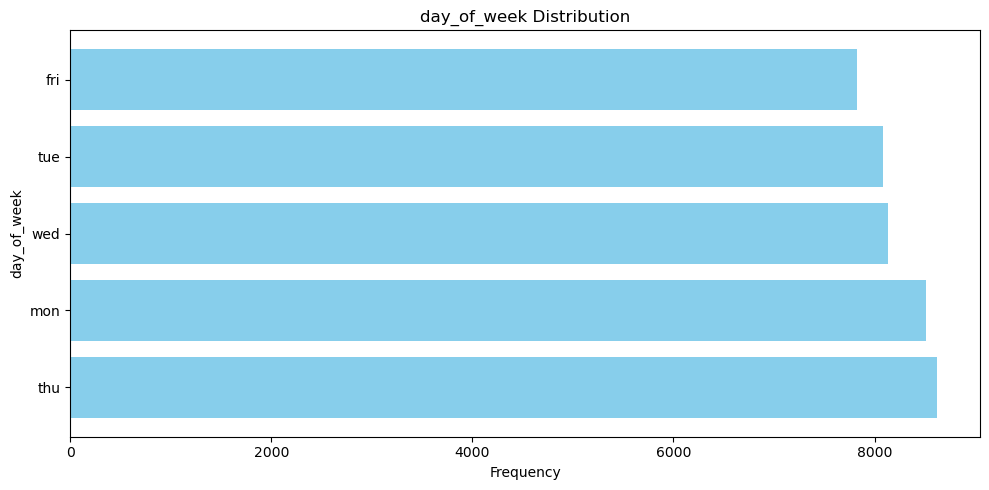

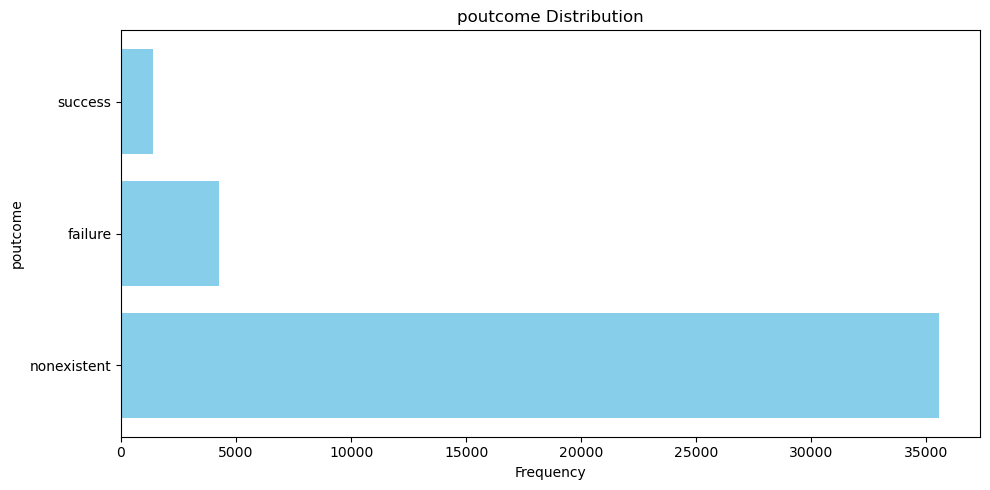

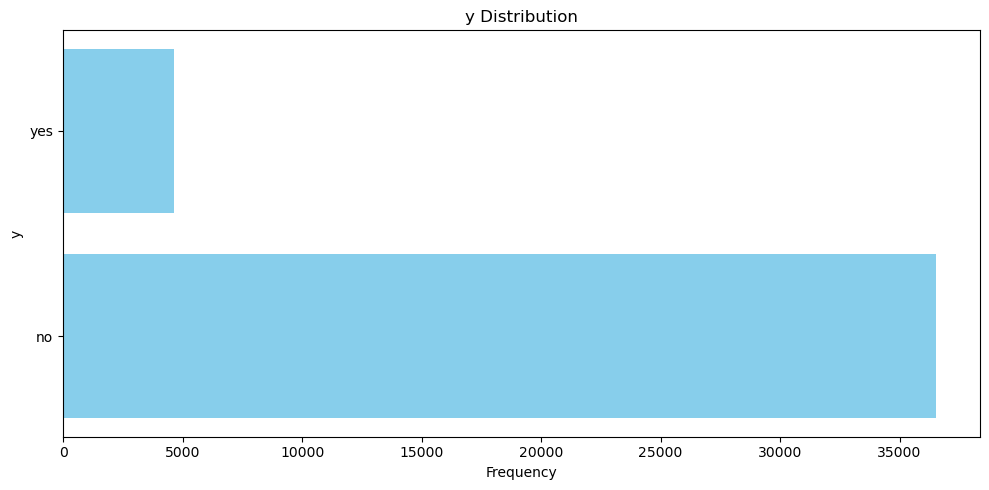

In [41]:
# Membuat grafik bar untuk variabel kategoris
for col in kategori:
    plt.figure(figsize=(10, 5))
    counts = datafr[col].value_counts()
    plt.barh(counts.index, counts.values, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel(col)
    plt.title(f'{col} Distribution')
    plt.tight_layout()
    plt.show()


**Kesimpulan:**

- Job: Audiens utama dalam kampanye ini terutama terdiri dari administrator, pekerja berkeahlian, dan teknisi.
- Marital: Sebagian besar dari mereka sudah menikah.
- Education: Sebagian besar klien memiliki gelar universitas, dengan sangat sedikit yang buta huruf.
- Default/Kredit: Kebanyakan orang tidak memiliki catatan default tetap pada rekam kredit mereka.
- Housing: Sebagian besar individu tidak memiliki pinjaman perumahan.
- Loan: Sebagian besar orang tidak memiliki pinjaman pribadi.
- Contact: Cara komunikasi yang paling umum adalah melalui ponsel.
- Month: Bulan Mei adalah bulan yang paling sibuk, sementara Desember adalah yang paling sepi.
- Day_of_week: Hari Kamis adalah hari paling sibuk, sedangkan Jumat adalah hari yang paling tidak sibuk dalam seminggu.
- Poutcome: Sebagian besar klien tidak memiliki hasil kampanye sebelumnya, hanya sedikit yang berhasil.
- Y (Berlangganan Deposito): Sebagian besar klien belum berlangganan deposito berjangka.

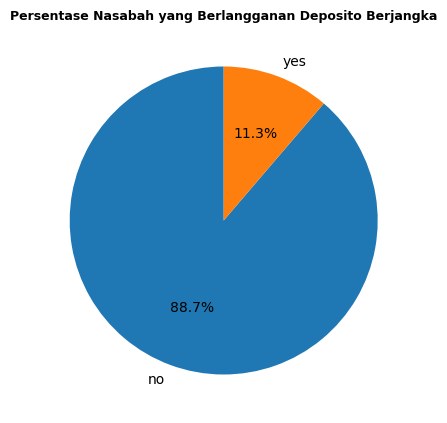

In [45]:
## Membuat visualisasi untuk nasabah yang berlangganan deposito berjangka (Term Deposito)
df_subscribe = datafr['y'].value_counts(normalize=True)*100

plt.figure(figsize=(5,5))
font = {'weight': 'bold','size': 9}
ax = plt.axes()
labels=df['y'].unique()
plt.title('Persentase Nasabah yang Berlangganan Deposito Berjangka', fontdict=font)
ab=plt.pie(df_subscribe, labels=labels, startangle=90,autopct='%1.1f%%')
plt.show()

**Kesimpulan:**

Dilihat dari hasil dari persentase total nasabah yang berlangganan deposito berjangka sebesar 11.27% dan nasabah yang tidak berlangganan sebesar 88.73%.

## Data Preprocessing

In [47]:
## Melakukan encode untuk mengubah data kategorikal menjadi nuemrikal
category = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
label_encoder = LabelEncoder()
for cols in category:
    datafr[cols] = label_encoder.fit_transform(datafr[cols])

In [48]:
## Melihat 10 data teratas setelah encode
datafr.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
5,45,7,1,2,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
7,41,1,1,7,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,24,9,2,5,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,25,7,2,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [49]:
## Melihat 10 data terbawah setelah encode
datafr.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,5,1,6,0,0,0,0,7,2,...,2,6,3,2,-1.1,94.767,-50.8,1.031,4963.6,1
41179,64,5,0,5,0,2,0,0,7,0,...,3,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41180,36,0,1,6,0,0,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41181,37,0,1,6,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41182,29,10,2,0,0,2,0,0,7,0,...,1,9,1,2,-1.1,94.767,-50.8,1.028,4963.6,0
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41187,74,5,1,5,0,2,0,0,7,0,...,3,999,1,0,-1.1,94.767,-50.8,1.028,4963.6,0


## Menentukan Pemodelan

In [52]:
## Melakukan pemisahan antara data training dan data test
## dengan test size sebesar 80/20
train,test = train_test_split(datafr,test_size = 0.20 ,random_state = 250)

In [103]:
#Memisahkan antara variabel dependen dan independen pada data training dan testing
X_train = train.drop(labels='y',axis=1)
y_train = train['y']

X_test  = test.drop(labels='y',axis=1)
y_test  = test['y']

In [105]:
## Melakukan Scaler untuk menghindari bias saat melakukan data modelling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

## Data Modeling

### Logistic Regression

In [106]:
## Membuat pemodelan logistic regression
logis_regress = LogisticRegression(
                        solver='liblinear', 
                        C=0.05, multi_class='ovr', 
                        random_state=50)
logis_regress.fit(X_train, y_train)

## Untuk menguji dataset
X_test = scaler.transform(X_test)

## Untuk memprediksi output
y_pred = logis_regress.predict(X_test)

## Hasil pemodelan
print(classification_report(y_test, y_pred))
print('Akurasi: ', metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7317
           1       0.67      0.42      0.51       919

    accuracy                           0.91      8236
   macro avg       0.80      0.70      0.73      8236
weighted avg       0.90      0.91      0.90      8236

Akurasi:  0.9117289946576008


**Kesimpulan:**
Berdasarkan hasil pemodelan untuk **Logistic Regression** didapati akurasi model yaitu: **0.9117289946576008** atau **91%**

In [107]:
## Menghitung Confusion matrix untuk data pengujian
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7126  191]
 [ 536  383]]


In [69]:
from sklearn.metrics import ConfusionMatrixDisplay

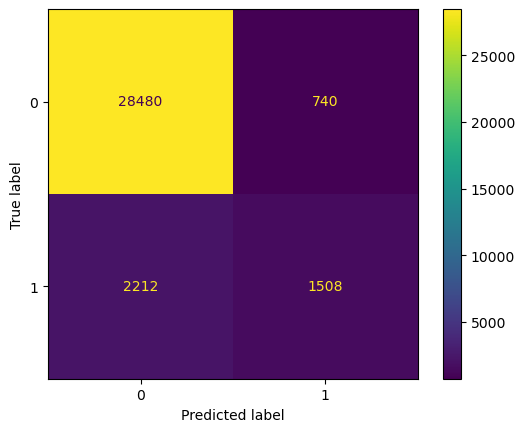

In [109]:
## Memvisualisasikan Confusion matrix untuk data pengujian data pelatihan

ConfusionMatrixDisplay.from_estimator(logis_regress, X_train, y_train)

Pada Visual Confusion Matrix di atas menunjukkan hasil:

* 28480 prediksi true negatif: 28480 data prediksi benar dinyatakan sebagai nol
* 2212 prediksi false negatif: 2212 data prediksi salah dinyatakan sebagai nol.
* 740 prediksi false positif: 740 data prediksi salah dinyatakan sebagai satu.
* 1508 prediksi positif yang benar: 1508 data prediksi benar dinyatakan sebagai satu.

### K-Neareast Neighbors

In [110]:
## Membuat modeling untuk K-Nearest Neighbors
k_nn = KNeighborsClassifier(n_neighbors=20)

## Melihat model menggunakan training set
k_nn.fit(X_train, y_train)

## Hasil Memprediksi respon/output
y_pred1 = k_nn.predict(X_test)

In [112]:
## Menghitung Confusion matrix untuk data pengujian

cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

[[7170  147]
 [ 617  302]]


In [111]:
print(classification_report(y_test, y_pred1))
print("Akurasi: ",metrics.accuracy_score(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7317
           1       0.67      0.33      0.44       919

    accuracy                           0.91      8236
   macro avg       0.80      0.65      0.70      8236
weighted avg       0.89      0.91      0.89      8236

Akurasi:  0.9072365225837785


**Kesimpulan:**
Berdasarkan hasil pemodelan untuk **K-NN** didapati akurasi model yaitu: **0.9072365225837785** atau **90%**

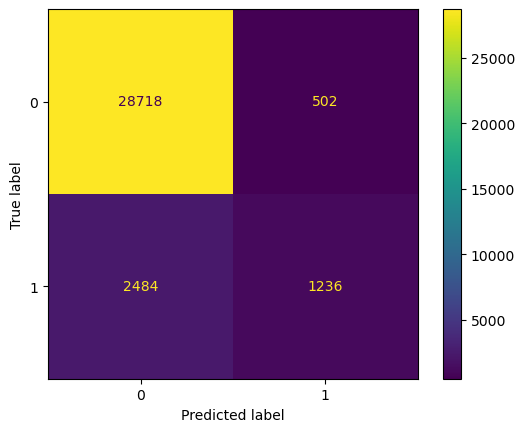

In [113]:
## Memvisualisasikan Confusion matrix untuk data pengujian data pelatihan

ConfusionMatrixDisplay.from_estimator(k_nn, X_train, y_train)

Pada Visual Confusion Matrix di atas menunjukkan hasil:

* 28718 prediksi true negatif: 28718 data prediksi benar dinyatakan sebagai nol
* 2484 prediksi false negatif: 2484 data prediksi salah dinyatakan sebagai nol.
* 502 prediksi false positif: 502 data prediksi salah dinyatakan sebagai satu.
* 1236 prediksi positif yang benar: 1236 data prediksi benar dinyatakan sebagai satu.

### Support Vector Machine

In [114]:
## Membuat Modelling SVM Classifier
svm_model = svm.SVC(kernel='linear') # Linear Kernel

## Melatih model
svm_model.fit(X_train, y_train) 

## Hasil Prediksi
y_pred2 = svm_model.predict(X_test)

In [115]:
## Confusion matrix untuk data pengujian
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[7157  160]
 [ 665  254]]


In [119]:
svm_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred2))
print("Akurasi:",metrics.accuracy_score(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7317
           1       0.61      0.28      0.38       919

    accuracy                           0.90      8236
   macro avg       0.76      0.63      0.66      8236
weighted avg       0.88      0.90      0.88      8236

Akurasi: 0.8998300145701797


**Kesimpulan:**
Berdasarkan hasil pemodelan untuk **SVM** didapati akurasi model yaitu: **0.8998300145701797** atau **89%**

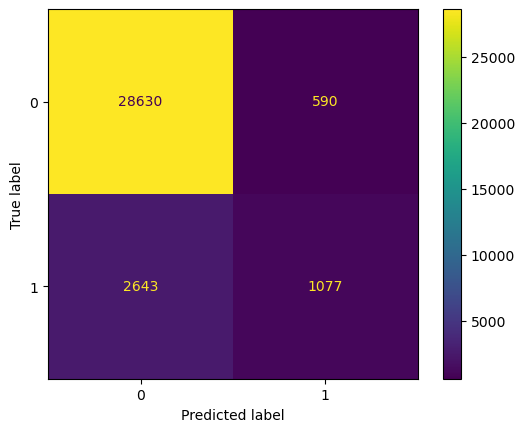

In [121]:
## Memvisualisasikan Confusion matrix untuk data pelatihan

ConfusionMatrixDisplay.from_estimator(svm_model, X_train, y_train)

Pada Visual Confusion Matrix di atas menunjukkan hasil:

* 28630 prediksi true negatif: 28630 data prediksi benar dinyatakan sebagai nol
* 2643 prediksi false negatif: 2643 data prediksi salah dinyatakan sebagai nol.
* 590 prediksi false positif: 590 data prediksi salah dinyatakan sebagai satu.
* 1077 prediksi positif yang benar: 1077 data prediksi benar dinyatakan sebagai satu.

### Decision Tree Classifier

In [124]:
## Membuat Modelling Decision Tree Classifier
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=5)

## Melatih Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

## Hasil Prediksi
y_pred3 = dtc.predict(X_test)

In [125]:
#Confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)

[[7072  245]
 [ 455  464]]


In [129]:
print(classification_report(y_test, y_pred3, zero_division=1))
print("Akurasi:",metrics.accuracy_score(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7317
           1       0.65      0.50      0.57       919

    accuracy                           0.92      8236
   macro avg       0.80      0.74      0.76      8236
weighted avg       0.91      0.92      0.91      8236

Akurasi: 0.9150072850898494


**Kesimpulan:**
Berdasarkan hasil pemodelan untuk **Decision Tree Classifier** didapati akurasi model yaitu: **0.9150072850898494** atau **91%**

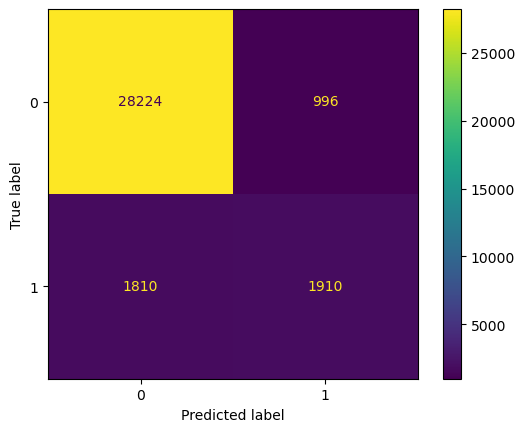

In [137]:
ConfusionMatrixDisplay.from_estimator(dtc, X_train, y_train)

Pada Visual Confusion Matrix di atas menunjukkan hasil:

* 28224 prediksi true negatif: 28224 data prediksi benar dinyatakan sebagai nol
* 1810 prediksi false negatif: 1810 data prediksi salah dinyatakan sebagai nol.
* 996 prediksi false positif: 996 data prediksi salah dinyatakan sebagai satu.
* 1910 prediksi positif yang benar: 1910 data prediksi benar dinyatakan sebagai satu.

### Random Forest Classifier

In [130]:
## Membuat model Random Forest
rfc = RandomForestClassifier(n_estimators=100)
 
## Melatih model
rfc.fit(X_train,y_train) 

## Hasil Prediksi
y_pred4 = rfc.predict(X_test)

In [131]:
#Confusion Matrix
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)

[[7060  257]
 [ 434  485]]


In [133]:
print(classification_report(y_test, y_pred4))
print("Akurasi: ",metrics.accuracy_score(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7317
           1       0.65      0.53      0.58       919

    accuracy                           0.92      8236
   macro avg       0.80      0.75      0.77      8236
weighted avg       0.91      0.92      0.91      8236

Akurasi:  0.9161000485672657


**Kesimpulan:**
Berdasarkan hasil pemodelan untuk **Random Forest Classifier** didapati akurasi model yaitu: **0.9161000485672657** atau **91%**

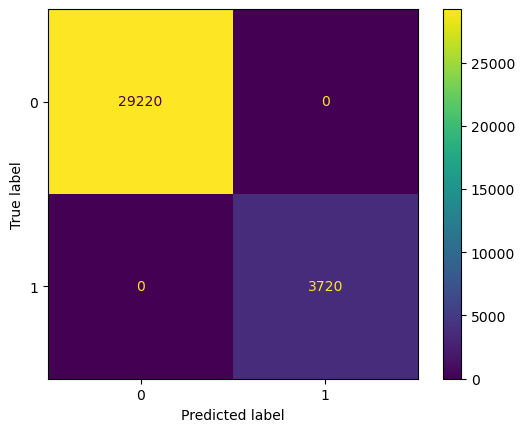

In [136]:
ConfusionMatrixDisplay.from_estimator(rfc, X_train, y_train)

Pada Visual Confusion Matrix di atas menunjukkan hasil:

* 29220 prediksi true negatif: 29220 data prediksi benar dinyatakan sebagai nol
* 0 prediksi false negatif: 0 data prediksi salah dinyatakan sebagai nol.
* 0 prediksi false positif: 0 data prediksi salah dinyatakan sebagai satu.
* 3720 prediksi positif yang benar: 3720 data prediksi benar dinyatakan sebagai satu.

### Naive Bayes Classifier

In [141]:
## Membuat model Gaussian Classifier
gnb = GaussianNB()

## Melatih the model dengan dataset
gnb.fit(X_train, y_train)

## Hasil Prediksi
y_pred5 = gnb.predict(X_test)

In [142]:
#Confusion Matrix dari data uji
cm5 = confusion_matrix(y_test, y_pred5)
print(cm5)

[[6419  898]
 [ 360  559]]


In [143]:
print(classification_report(y_test, y_pred5))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      7317
           1       0.38      0.61      0.47       919

    accuracy                           0.85      8236
   macro avg       0.67      0.74      0.69      8236
weighted avg       0.88      0.85      0.86      8236

Accuracy: 0.8472559494900437


**Kesimpulan:**
Berdasarkan hasil pemodelan untuk **Naive Bayes Classifier** didapati akurasi model yaitu: **0.8472559494900437** atau **84%**

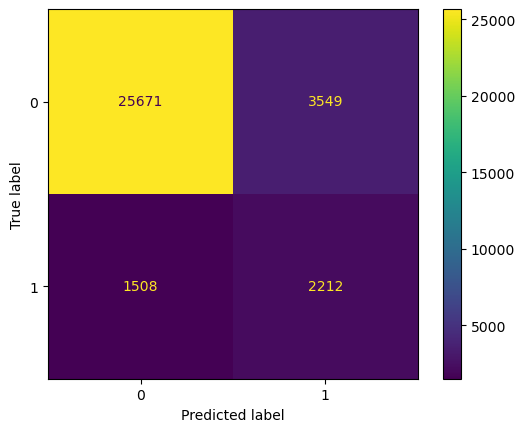

In [144]:
ConfusionMatrixDisplay.from_estimator(gnb, X_train, y_train)

Pada Visual Confusion Matrix di atas menunjukkan hasil:

* 25671 prediksi true negatif: 25671 data prediksi benar dinyatakan sebagai nol
* 1508 prediksi false negatif: 1508 data prediksi salah dinyatakan sebagai nol.
* 3549 prediksi false positif: 3549 data prediksi salah dinyatakan sebagai satu.
* 2212 prediksi positif yang benar: 2212 data prediksi benar dinyatakan sebagai satu.

## Kesimpulan

Dari hasil di bawah ini:

In [146]:
print("Logistic Regression:",metrics.accuracy_score(y_test, y_pred))
print("K-Nearest Neighbors:",metrics.accuracy_score(y_test, y_pred1))
print("Support Vector Machine:",metrics.accuracy_score(y_test, y_pred2))
print("Decision Tree Classifier:",metrics.accuracy_score(y_test, y_pred3))
print("Random Forest Classifier:",metrics.accuracy_score(y_test, y_pred4))
print("Naive Bayes Classifier:",metrics.accuracy_score(y_test, y_pred5))

Logistic Regression: 0.9117289946576008
K-Nearest Neighbors: 0.9072365225837785
Support Vector Machine: 0.8998300145701797
Decision Tree Classifier: 0.9150072850898494
Random Forest Classifier: 0.9161000485672657
Naive Bayes Classifier: 0.8472559494900437


dari akurasi diatas dapat disimpulkan bahwa Model Logistic Regression, Decision Tree Classifier, dan Random Forest Classifier memiliki akaurasi tertinggi.